# Explore here

In [15]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

True

In [18]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

weekend_uri =  'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get("CLIENT_SECRET")

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id,client_secret = client_secret))

results = spotify.artist_top_tracks(weekend_uri)
print(results)
                          





{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'}, 'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ', 'id': '1Xyo4u8uXC1ZmMpatF05PJ', 'name': 'The Weeknd', 'type': 'artist', 'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/18sR8zHx4zsVJUI4bHWuPC'}, 'href': 'https://api.spotify.com/v1/albums/18sR8zHx4zsVJUI4bHWuPC', 'id': '18sR8zHx4zsVJUI4bHWuPC', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c87bfeef81a210ddb7f717b5', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c87bfeef81a210ddb7f717b5', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c87bfeef81a210ddb7f717b5', 'width': 64}], 'is_playable': True, 'name': 'The Highlights (Deluxe)', 'release_date': '2024-02-09', 'release_date_precision': 'day', 'total_tracks': 36, 'type': 

In [20]:
artist_id = "1Xyo4u8uXC1ZmMpatF05PJ"

# TODO: Use .artist_top_tracks(artist_id) to get the artist's top tracks
results = spotify.artist_top_tracks(weekend_uri)
print(results)
      


{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'}, 'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ', 'id': '1Xyo4u8uXC1ZmMpatF05PJ', 'name': 'The Weeknd', 'type': 'artist', 'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/18sR8zHx4zsVJUI4bHWuPC'}, 'href': 'https://api.spotify.com/v1/albums/18sR8zHx4zsVJUI4bHWuPC', 'id': '18sR8zHx4zsVJUI4bHWuPC', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c87bfeef81a210ddb7f717b5', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c87bfeef81a210ddb7f717b5', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c87bfeef81a210ddb7f717b5', 'width': 64}], 'is_playable': True, 'name': 'The Highlights (Deluxe)', 'release_date': '2024-02-09', 'release_date_precision': 'day', 'total_tracks': 36, 'type': 

In [21]:
for r in results:
    print(r)

tracks


In [22]:
for k in results['tracks'][0]:
    print(k)



album
artists
disc_number
duration_ms
explicit
external_ids
external_urls
href
id
is_local
is_playable
name
popularity
preview_url
track_number
type
uri


In [23]:
for track in results [ 'tracks']:
    print(track['name'])

One Of The Girls (with JENNIE, Lily Rose Depp)
Popular (with Playboi Carti & Madonna)
Starboy
Die For You
Blinding Lights
Creepin' (with The Weeknd & 21 Savage)
Stargirl Interlude
Save Your Tears
The Hills
Die For You (with Ariana Grande) - Remix


In [26]:
tracks = []
for track in results['tracks']:
    tracks.append({
        'name' : track['name'],
        'popularity': track['popularity'],
        'duration' : track['duration_ms'] 
        
    })

    tracks_df = pd.DataFrame(tracks)
    tracks_df = tracks_df.sort_values(by= 'popularity')

    print(tracks_df.head(10))

                                             name  popularity  duration
0  One Of The Girls (with JENNIE, Lily Rose Depp)          86    244684
                                             name  popularity  duration
1          Popular (with Playboi Carti & Madonna)          85    215466
0  One Of The Girls (with JENNIE, Lily Rose Depp)          86    244684
                                             name  popularity  duration
1          Popular (with Playboi Carti & Madonna)          85    215466
0  One Of The Girls (with JENNIE, Lily Rose Depp)          86    244684
2                                         Starboy          93    230453
                                             name  popularity  duration
1          Popular (with Playboi Carti & Madonna)          85    215466
0  One Of The Girls (with JENNIE, Lily Rose Depp)          86    244684
3                                     Die For You          89    260253
2                                         Starboy          93   

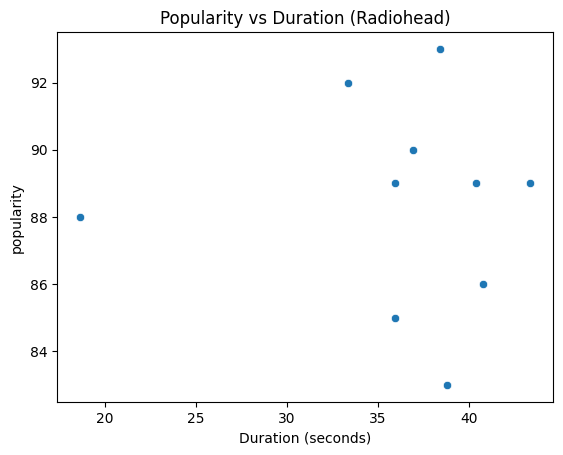

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

tracks_df = tracks_df.sort_values(by= 'popularity')
tracks_df['duration'] = tracks_df['duration'] / 6000

sns.scatterplot(data=tracks_df, x='duration', y='popularity')
plt.title('Popularity vs Duration (Radiohead)')
plt.xlabel('Duration (seconds)')
plt.show()